<a href="https://colab.research.google.com/github/diemasariasena/Project-Data-Diemas/blob/main/Project_4_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
#Import file dari my drive
from google.colab import drive

In [3]:
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data = pd.read_csv(r'/content/gdrive/My Drive/segmentation data.csv')
data.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000018,0,0,25,0,157434,1,2
1,100000020,0,0,31,0,144657,1,1
2,100000032,0,0,27,0,120131,1,1
3,100000033,0,0,30,0,162745,1,2
4,100000036,0,0,25,0,104505,0,0
5,100000037,0,0,31,0,143385,1,2
6,100000040,0,0,24,0,92542,1,1
7,100000041,0,0,30,0,163329,2,1
8,100000051,0,0,29,0,84531,0,0
9,100000052,0,0,30,0,180196,2,2


In [5]:
# Mengimpor dataset
dataset = pd.read_csv(r'/content/gdrive/My Drive/segmentation data.csv')
X = dataset.iloc[:,3:6].values
X[:5]

array([[    25,      0, 157434],
       [    31,      0, 144657],
       [    27,      0, 120131],
       [    30,      0, 162745],
       [    25,      0, 104505]])

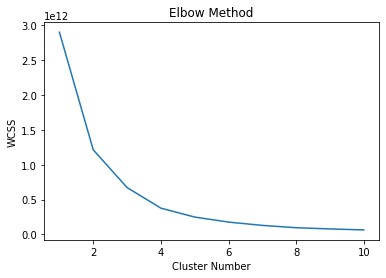

In [6]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

## K Mean Cluster, Clusternya ada 5

In [7]:
# Menjalankan K-Means Clustering ke dataset dengan 5 cluster

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

dataset['f_cluster'] = y_kmeans + 1
dataset.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,f_cluster
0,100000018,0,0,25,0,157434,1,2,3
1,100000020,0,0,31,0,144657,1,1,3
2,100000032,0,0,27,0,120131,1,1,1
3,100000033,0,0,30,0,162745,1,2,3
4,100000036,0,0,25,0,104505,0,0,1


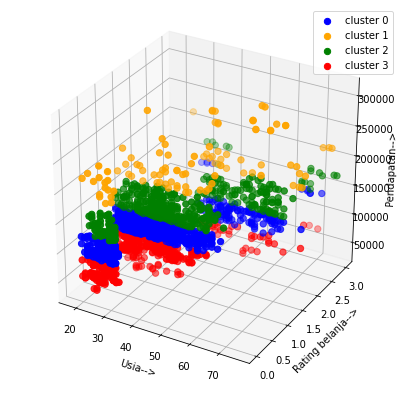

In [8]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],X[y_kmeans == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.set_xlabel('Usia-->')
ax.set_ylabel('Rating belanja-->')
ax.set_zlabel('Pendapatan-->')
ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed

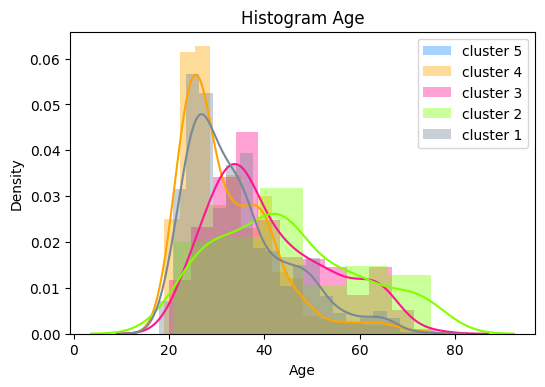

In [9]:
sumbuX="Age"

plt.subplots(figsize=(6,4), dpi=100)
sns.distplot( dataset.loc[dataset.f_cluster==5,sumbuX] , color="dodgerblue", label="cluster 5")
sns.distplot( dataset.loc[dataset.f_cluster==4,sumbuX] , color="orange", label="cluster 4")
sns.distplot( dataset.loc[dataset.f_cluster==3,sumbuX] , color="deeppink", label="cluster 3")
sns.distplot( dataset.loc[dataset.f_cluster==2,sumbuX] , color="chartreuse", label="cluster 2")
sns.distplot( dataset.loc[dataset.f_cluster==1,sumbuX] , color="lightslategrey", label="cluster 1")

plt.title('Histogram '+sumbuX)
plt.legend();

In [10]:
# Menjalankan K-Means Clustering ke dataset dengan 3 cluster

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

dataset['t_cluster'] = y_kmeans + 1
dataset.head(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,f_cluster,t_cluster
0,100000018,0,0,25,0,157434,1,2,3,1
1,100000020,0,0,31,0,144657,1,1,3,1
2,100000032,0,0,27,0,120131,1,1,1,1
3,100000033,0,0,30,0,162745,1,2,3,1
4,100000036,0,0,25,0,104505,0,0,1,2


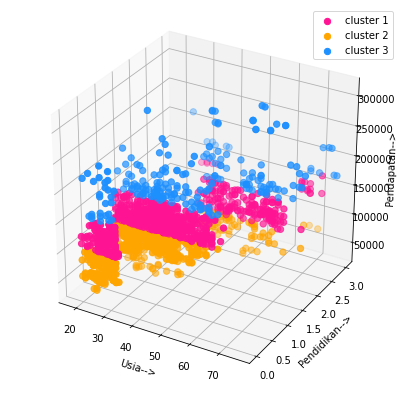

In [11]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 40 , color = 'deeppink', label = "cluster 1")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 40 , color = 'orange', label = "cluster 2")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 40 , color = 'dodgerblue', label = "cluster 3")
ax.set_xlabel('Usia-->')
ax.set_ylabel('Pendidikan-->')
ax.set_zlabel('Pendapatan-->')
ax.legend()
plt.show()

## Karakter Setiap Kluster

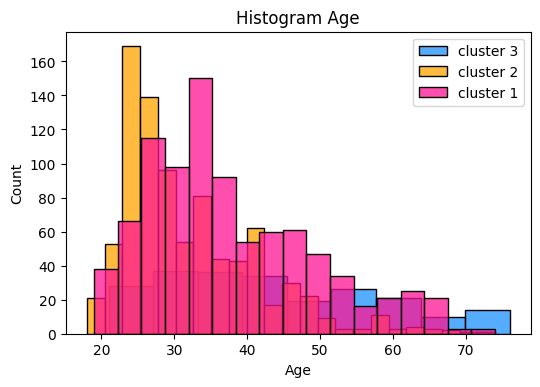

In [12]:
sumbuX="Age"

plt.subplots(figsize=(6,4), dpi=100)
sns.histplot( dataset.loc[dataset.t_cluster==3,sumbuX] , color="dodgerblue", label="cluster 3")
sns.histplot( dataset.loc[dataset.t_cluster==2,sumbuX] , color="orange", label="cluster 2")
sns.histplot( dataset.loc[dataset.t_cluster==1,sumbuX] , color="deeppink", label="cluster 1")

plt.title('Histogram '+sumbuX)
plt.legend();

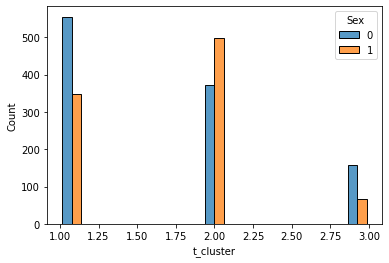

In [13]:
sns.histplot(data=dataset, x="t_cluster", hue="Sex", multiple="dodge", shrink=.8)

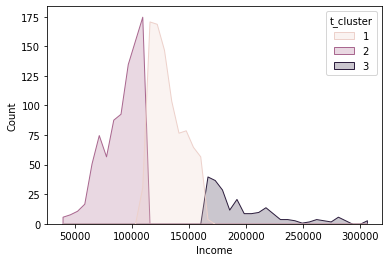

In [14]:
sns.histplot(dataset, x="Income", hue="t_cluster", element="poly")

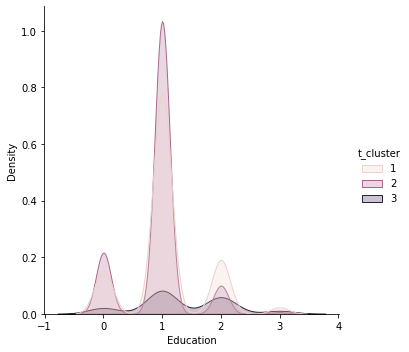

In [15]:
sns.displot(dataset, x="Education", hue="t_cluster", kind="kde", fill=True)

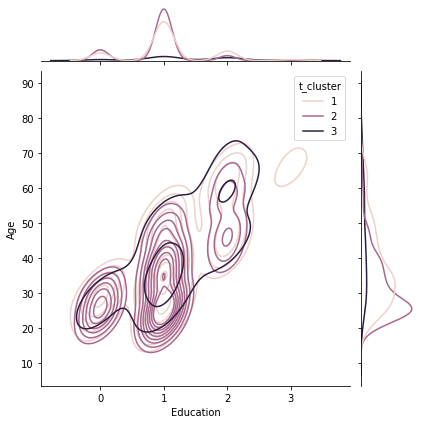

In [16]:
sns.jointplot(
    data=dataset,
    x="Education", y="Age", hue="t_cluster",
    kind="kde"
)

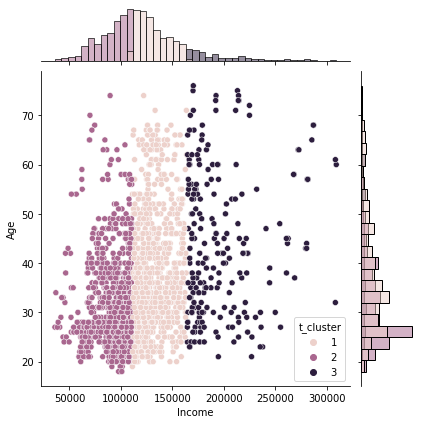

In [17]:
g = sns.JointGrid(data=dataset, x="Income", y="Age", hue="t_cluster")
g.plot(sns.scatterplot, sns.histplot)

In [18]:
centroids = kmeans.cluster_centers_
centroids

array([[3.77314917e+01, 1.07182320e+00, 1.31283906e+05],
       [3.19528736e+01, 9.22988506e-01, 9.03934207e+04],
       [4.38755556e+01, 1.34666667e+00, 1.97576120e+05]])